# Data Transform

In this notebook, we will ask you a series of questions to evaluate your findings from your EDA. Based on your response & justification, we will ask you to also apply a subsequent data transformation. 

If you state that you will not apply any data transformations for this step, you must **justify** as to why your dataset/machine-learning does not require the mentioned data preprocessing step.

The bonus step is completely optional, but if you provide a sufficient feature engineering step in this project we will add `1000` points to your Kahoot leaderboard score.

You will write out this transformed dataframe as a `.csv` file to your `data/` folder.

**Note**: Again, note that this dataset is quite large. If you find that some data operations take too long to complete on your machine, simply use the `sample()` method to transform a subset of your data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


## Q1

Does your model contain any missing values or "non-predictive" columns? If so, which adjustments should you take to ensure that your model has good predictive capabilities? Apply your data transformations (if any) in the code-block below.

Answer here

EMPTY SPACE, DELETE AFTER

In [2]:
transactions = pd.read_csv("../data/bank_transactions.csv")

In [3]:
# Count of missing values per column
transactions.isnull().sum()


type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
non_predictive = ['nameOrig', 'nameDest']
target = 'isFraud'

In [5]:
# Drop non-predictive columns
transactions_cleaned = transactions.drop(columns=['nameOrig', 'nameDest'])

In [6]:
# Check final shape and column types
transactions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1000000 non-null  object 
 1   amount          1000000 non-null  float64
 2   oldbalanceOrg   1000000 non-null  float64
 3   newbalanceOrig  1000000 non-null  float64
 4   oldbalanceDest  1000000 non-null  float64
 5   newbalanceDest  1000000 non-null  float64
 6   isFraud         1000000 non-null  int64  
 7   isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 61.0+ MB


## Q2

Do certain transaction types consistently differ in amount or fraud likelihood? If so, how might you transform the type column to make this pattern usable by a machine learning model? Apply your data transformations (if any) in the code-block below.

Answer here

EMPTY SPACE DELETE AFTER

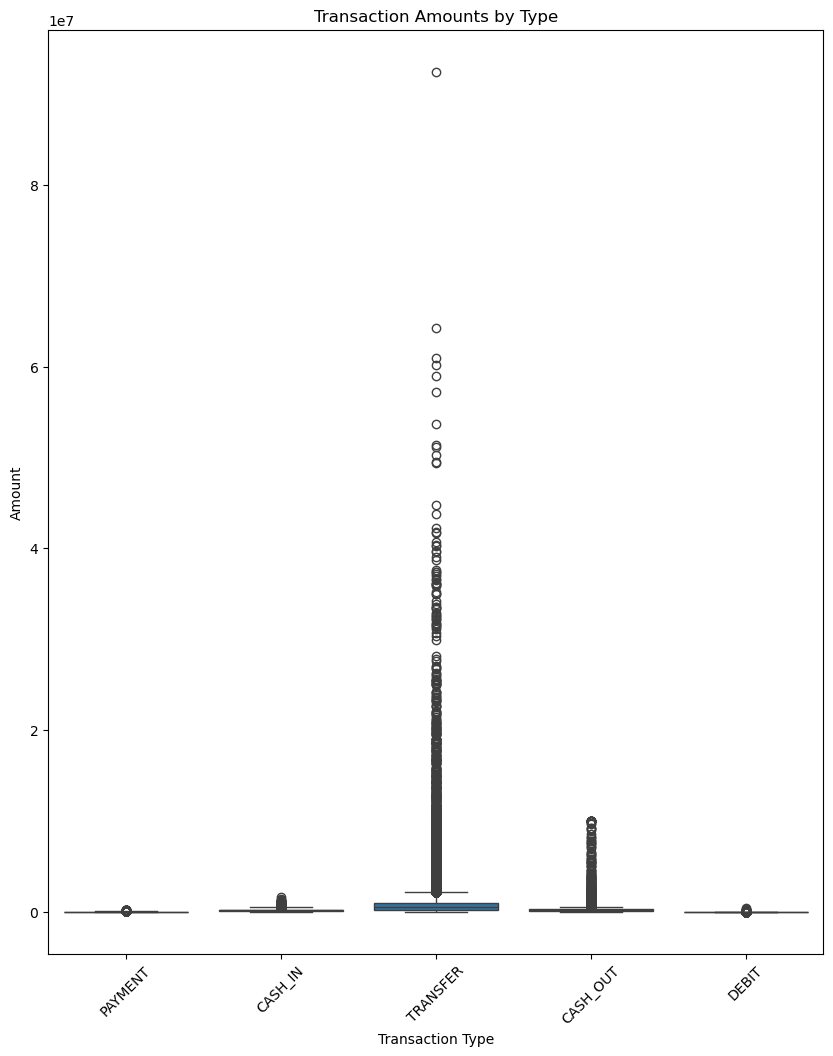

In [7]:
plt.figure(figsize=(10,12))
sns.boxplot(x='type', y='amount', data=transactions)
plt.title('Transaction Amounts by Type')
plt.ylabel('Amount')
plt.xlabel('Transaction Type')
plt.xticks(rotation=45)
plt.show()

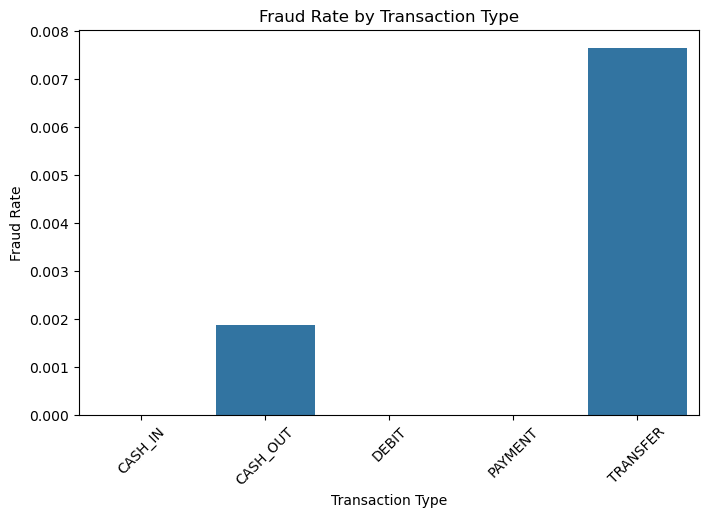

In [8]:
# Calculate fraud rate per type
fraud_by_type = transactions.groupby('type')['isFraud'].mean().reset_index()

# Bar plot of fraud rates
plt.figure(figsize=(8,5))
sns.barplot(x='type', y='isFraud', data=fraud_by_type)
plt.title('Fraud Rate by Transaction Type')
plt.ylabel('Fraud Rate')
plt.xlabel('Transaction Type')
plt.xticks(rotation=45)
plt.show()

In [9]:
# One-hot encode the 'type' column
transactions_encoded = pd.get_dummies(transactions, columns=['type'], drop_first=True)


In [10]:
transactions_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   amount          1000000 non-null  float64
 1   nameOrig        1000000 non-null  object 
 2   oldbalanceOrg   1000000 non-null  float64
 3   newbalanceOrig  1000000 non-null  float64
 4   nameDest        1000000 non-null  object 
 5   oldbalanceDest  1000000 non-null  float64
 6   newbalanceDest  1000000 non-null  float64
 7   isFraud         1000000 non-null  int64  
 8   isFlaggedFraud  1000000 non-null  int64  
 9   type_CASH_OUT   1000000 non-null  bool   
 10  type_DEBIT      1000000 non-null  bool   
 11  type_PAYMENT    1000000 non-null  bool   
 12  type_TRANSFER   1000000 non-null  bool   
dtypes: bool(4), float64(5), int64(2), object(2)
memory usage: 72.5+ MB


## Q3

After exploring your data, you may have noticed that fraudulent transactions are rare compared to non-fraudulent ones. What challenges might this pose when training a machine learning model? What strategies could you use to ensure your model learns meaningful patterns from the minority class? Apply your data transformations (if any) in the code-block below.

Answer here

EMPTY SPACE DELETE AFTER

In [11]:
# Count of fraudulent vs. non-fraudulent transactions
transactions['isFraud'].value_counts()

isFraud
0    998703
1      1297
Name: count, dtype: int64

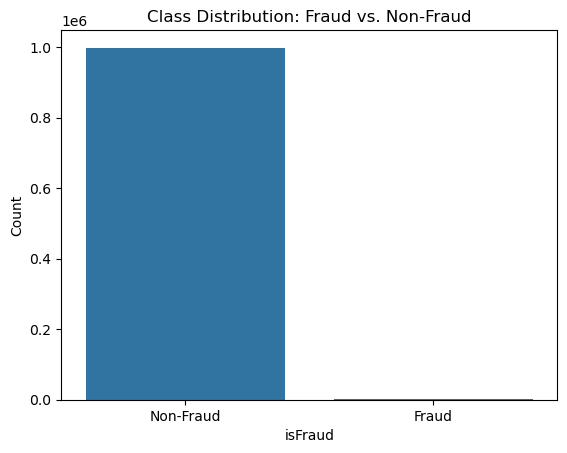

In [12]:
sns.countplot(x='isFraud', data=transactions)
plt.title('Class Distribution: Fraud vs. Non-Fraud')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

In [13]:
X = transactions_encoded.drop(columns=['isFraud', 'nameOrig', 'nameDest'], errors='ignore')
y = transactions_encoded['isFraud']

In [14]:
X.dtypes.value_counts()


float64    5
bool       4
int64      1
Name: count, dtype: int64

In [15]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [16]:
X = transactions_encoded.drop(columns=['isFraud', 'nameOrig', 'nameDest'], errors='ignore')
y = transactions_encoded['isFraud']

In [17]:
X.select_dtypes(include='object').nunique()

Series([], dtype: float64)

In [18]:
# START CLEAN: Make a fresh copy
df = transactions.copy()

# Drop target and any known non-predictive columns
X = df.drop(columns=['isFraud', 'nameOrig', 'nameDest'], errors='ignore')
y = df['isFraud']

# If 'type' is not yet encoded, do it here
if 'type' in X.columns and X['type'].dtype == 'object':
    X = pd.get_dummies(X, columns=['type'], drop_first=True)

# Confirm all features are now numeric
print("Still non-numeric columns:", X.select_dtypes(include='object').columns.tolist())


Still non-numeric columns: []


In [19]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [20]:
print("Original class distribution:\n", y.value_counts())
print("Resampled shape:", X_resampled.shape)

# Check class balance
print("Resampled class distribution:\n", pd.Series(y_resampled).value_counts())

Original class distribution:
 isFraud
0    998703
1      1297
Name: count, dtype: int64
Resampled shape: (1997406, 10)
Resampled class distribution:
 isFraud
0    998703
1    998703
Name: count, dtype: int64


## Bonus (optional)

Are there interaction effects between variables (e.g., fraud and high amount and transaction type) that aren't captured directly in the dataset? Would it be helpful to manually engineer any new features that reflect these interactions? Apply your data transformations (if any) in the code-block below.

Answer Here

In [21]:
df = transactions.copy()

# Example: Binary feature for high amount (above 75th percentile)
df['high_amount'] = (df['amount'] > df['amount'].quantile(0.75)).astype(int)

# Example: Flag when balance goes to 0
df['zero_balance_after'] = (df['newbalanceOrig'] == 0).astype(int)

# Example: Fraud-prone transaction types
df['is_cash_or_transfer'] = df['type'].isin(['CASH_OUT', 'TRANSFER']).astype(int)

# Interaction feature: High amount + fraud-prone type
df['risky_combo'] = df['high_amount'] * df['is_cash_or_transfer']


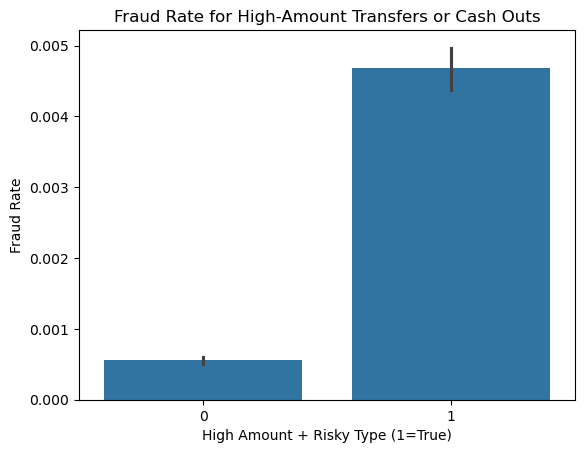

In [22]:
sns.barplot(x='risky_combo', y='isFraud', data=df)
plt.title('Fraud Rate for High-Amount Transfers or Cash Outs')
plt.xlabel('High Amount + Risky Type (1=True)')
plt.ylabel('Fraud Rate')
plt.show()


In [23]:
# write out newly transformed dataset to your folder
# Save to current working directory
df.to_csv('transformed_transactions.csv', index=False)

print("✅ Transformed dataset saved as 'transformed_transactions.csv'")


✅ Transformed dataset saved as 'transformed_transactions.csv'
